In [1]:
from keras.utils import to_categorical
# from keras_preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img
import cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
root_dir = 'D:/Real_Time_Sentiment_Analysis/data'
train_dir = root_dir + '/train/'
test_dir = root_dir + '/test/'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(train_dir)

angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [5]:

print(train)

                                                   image      label
0      D:/Real_Time_Sentiment_Analysis/data/train/ang...      angry
1      D:/Real_Time_Sentiment_Analysis/data/train/ang...      angry
2      D:/Real_Time_Sentiment_Analysis/data/train/ang...      angry
3      D:/Real_Time_Sentiment_Analysis/data/train/ang...      angry
4      D:/Real_Time_Sentiment_Analysis/data/train/ang...      angry
...                                                  ...        ...
28704  D:/Real_Time_Sentiment_Analysis/data/train/sur...  surprised
28705  D:/Real_Time_Sentiment_Analysis/data/train/sur...  surprised
28706  D:/Real_Time_Sentiment_Analysis/data/train/sur...  surprised
28707  D:/Real_Time_Sentiment_Analysis/data/train/sur...  surprised
28708  D:/Real_Time_Sentiment_Analysis/data/train/sur...  surprised

[28709 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(test_dir)

angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [7]:
print(test)
print(test['image'])

                                                  image      label
0     D:/Real_Time_Sentiment_Analysis/data/test/angr...      angry
1     D:/Real_Time_Sentiment_Analysis/data/test/angr...      angry
2     D:/Real_Time_Sentiment_Analysis/data/test/angr...      angry
3     D:/Real_Time_Sentiment_Analysis/data/test/angr...      angry
4     D:/Real_Time_Sentiment_Analysis/data/test/angr...      angry
...                                                 ...        ...
7173  D:/Real_Time_Sentiment_Analysis/data/test/surp...  surprised
7174  D:/Real_Time_Sentiment_Analysis/data/test/surp...  surprised
7175  D:/Real_Time_Sentiment_Analysis/data/test/surp...  surprised
7176  D:/Real_Time_Sentiment_Analysis/data/test/surp...  surprised
7177  D:/Real_Time_Sentiment_Analysis/data/test/surp...  surprised

[7178 rows x 2 columns]
0       D:/Real_Time_Sentiment_Analysis/data/test/angr...
1       D:/Real_Time_Sentiment_Analysis/data/test/angr...
2       D:/Real_Time_Sentiment_Analysis/data/test/angr.

In [8]:

from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode = 'grayscale' )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:

y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

c:\Users\srish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [19]:
# model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

In [20]:
print(model.name)

sequential


In [ ]:
from tensorflow.keras.models import load_model

# Load the HDF5 model
model_h5 = load_model('sequential_saved_model.h5')


In [22]:
model_h5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,229,449 (35.21 MB)

 Trainable params: 9,228,423 (35.20 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
model = load_model('sequential_saved_model.h5')

In [24]:
label = ['angry','disgusted','fearful','happy','neutral','sad','surprised']

In [25]:

def ef(image):
    img = load_img(image,color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [26]:
image = 'data/train/sad/im42.png'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
model prediction is  sad


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
model prediction is  sad


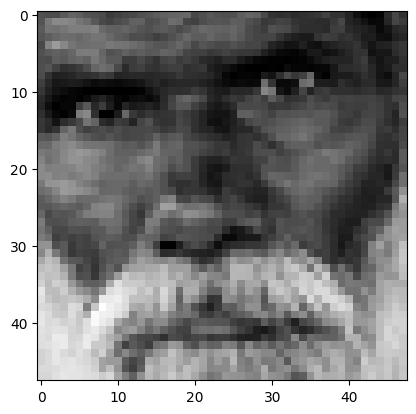

In [28]:
image = 'data/train/sad/im42.png'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
model prediction is  fearful


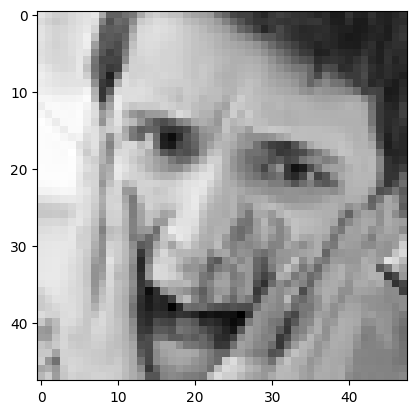

In [29]:
image = 'data/train/fearful/im12.png'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
model prediction is  disgusted


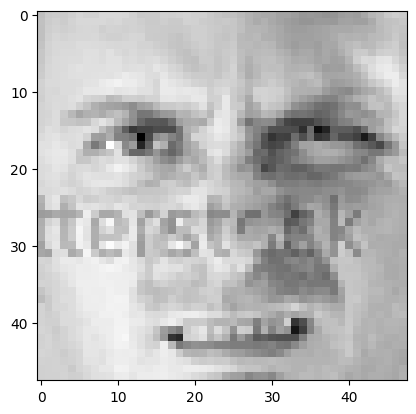

In [30]:
image = 'data/train/disgusted/im299.png'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
model prediction is  happy


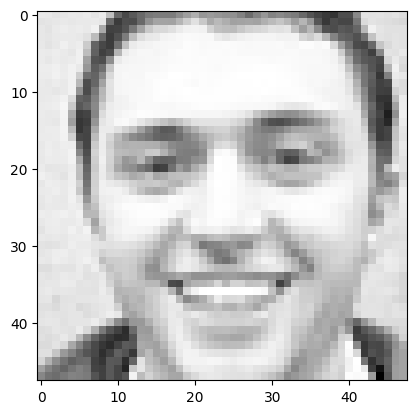

In [31]:

image = 'data/train/happy/im7.png'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
model prediction is  surprised


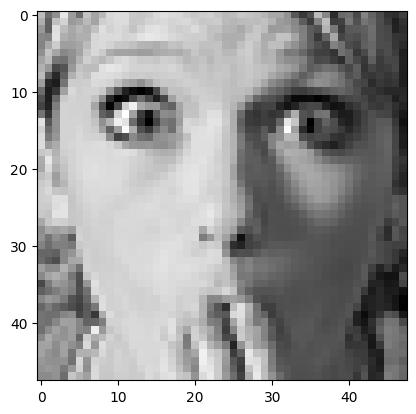

In [32]:
image = 'data/train/surprised/im15.png'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')